## Import Libray

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load Dataset

In [7]:
dataset = pd.read_csv('anemia.csv')

In [8]:
dataset.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## Data Understanding

In [4]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[22.7 29.1]
 [25.4 28.3]
 [21.5 29.6]
 ...
 [17.7 28.1]
 [16.2 29.5]
 [21.2 28.4]]


In [6]:
print(y)

[0 0 1 ... 1 0 1]


In [9]:
print ("Data Shape : ", dataset.shape)

Data Shape :  (1421, 6)


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


## Cleaning Data

In [11]:
dataset.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [8]:
print(x_train)

[[27.7 31. ]
 [20.  32.2]
 [18.9 27.8]
 ...
 [21.7 29.7]
 [24.3 32.5]
 [19.  31.3]]


In [9]:
len(x_train)

1065

In [10]:
len(x)

1421

In [11]:
len(x_test)

356

In [12]:
len(y)

1421

In [13]:
len(y_test)

356

In [14]:
len(y_train)

1065

## EDA 

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


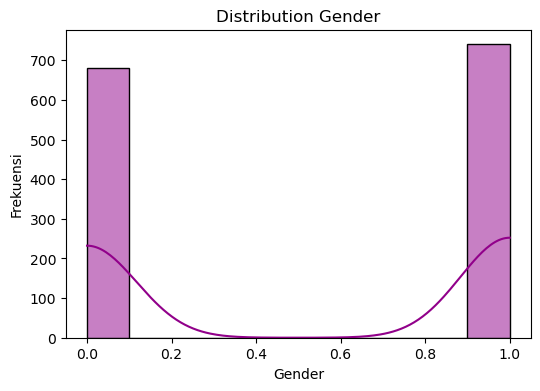

In [14]:
# visualisasi pada attribute Gender 
plt.figure(figsize=(6,4))
sns.histplot(data=dataset, x='Gender', bins=10, kde=True, color='#91008a')

plt.title('Distribution Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.show()

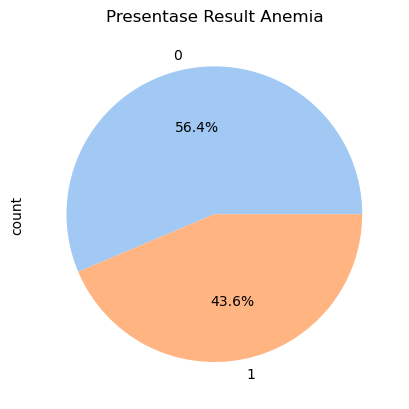

In [15]:
# visualisasi Hasil
sns.set_palette('pastel')
dataset['Result'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Result Anemia')
plt.show()

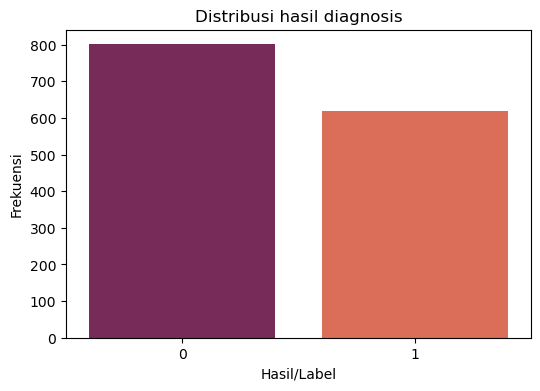

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='Result', palette='rocket')

plt.title('Distribusi hasil diagnosis')
plt.xlabel('Hasil/Label')
plt.ylabel('Frekuensi')
plt.show()

## Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
print(x_train)

[[ 1.19724252  0.51311835]
 [-0.73421547  1.36965604]
 [-1.01013804 -1.77098215]
 ...
 [-0.30778968 -0.41479748]
 [ 0.34439094  1.58379047]
 [-0.98505417  0.72725278]]


In [17]:
print(x_test)

[[ 0.87115221  0.08484951]
 [-0.33287355 -0.77168818]
 [ 0.67048125 -0.48617562]
 [-0.15728646 -0.2720412 ]
 [-1.36131222  0.9413872 ]
 [ 0.69556512 -0.41479748]
 [-1.18572513  0.29898393]
 [ 0.21897159 -1.62822587]
 [-0.88471869 -0.6289319 ]
 [-1.08538965 -0.84306632]
 [ 0.16880385 -0.6289319 ]
 [-0.23253807  0.29898393]
 [-0.00678324 -1.05720075]
 [-0.23253807 -1.48546959]
 [ 1.12199091 -1.48546959]
 [-0.7091316  -1.77098215]
 [ 1.64875218  1.36965604]
 [-0.9599703  -0.98582261]
 [-0.75929934 -0.98582261]
 [ 0.21897159 -1.62822587]
 [ 0.34439094  0.79863092]
 [ 1.64875218  0.29898393]
 [ 1.22232639  1.36965604]
 [-0.28270581  1.15552162]
 [ 1.14707478 -1.27133517]
 [ 0.67048125 -0.2720412 ]
 [ 1.12199091  1.51241233]
 [-1.06030578  1.15552162]
 [-0.30778968  0.37036207]
 [-1.51181544 -1.62822587]
 [-0.53354451  1.15552162]
 [-1.73757027  1.36965604]
 [ 1.02165543  1.51241233]
 [-0.43320903  0.51311835]
 [ 1.27249413  1.36965604]
 [-0.7091316   1.51241233]
 [ 1.49824896 -1.27133517]
 

## Preparation Data

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[149  58]
 [ 58  91]]


## Training

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11756\1662113415.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


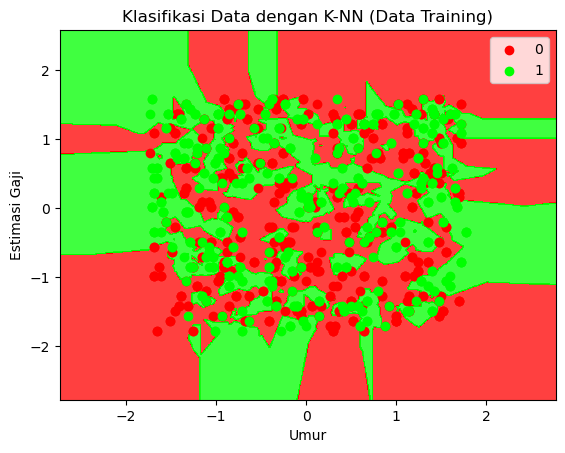

In [35]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Assuming classifier, x_train, and y_train are already defined

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['#FF0000', '#00FF00']))  # Using hex color codes for red and green
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(['#FF0000', '#00FF00'])(i), label=j)  # Using hex color codes for red and green

plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

## Testing

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11756\912530092.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


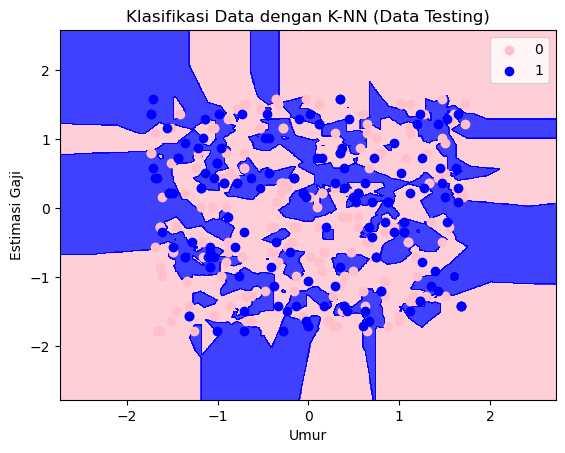

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Assuming classifier, x_test, and y_test are already defined

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['#FFC0CB', '#0000FF']))  # Using hex color codes for pink and blue
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(['#FFC0CB', '#0000FF'])(i), label=j)  # Using hex color codes for pink and blue

plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

## Modeling

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13796\3389801963.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label="Test data")


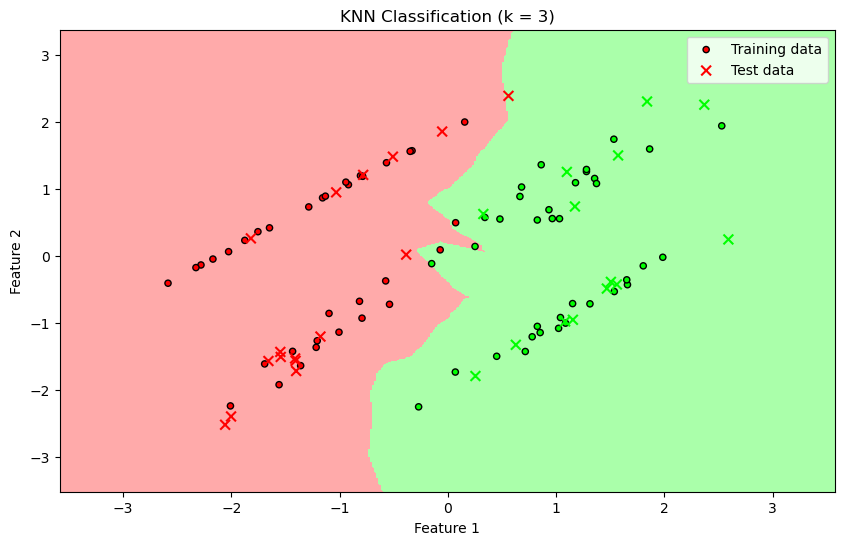

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Membuat dataset buatan
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Membuat grid untuk visualisasi
h = .02  # ukuran step di mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memetakan prediksi ke dalam grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Membuat plot
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot titik training
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label="Training data")
# Plot titik test
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x', label="Test data")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification (k = 3)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
